In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('../Festival_Data/sns언급량/sns언급량.csv', encoding='utf-8-sig')

print(df.head())  

   year  month Province City Location  Search_Volume
0  2024      1     충청남도  공주시      NaN          20466
1  2024      2     충청남도  공주시      NaN          21763
2  2024      3     충청남도  공주시      NaN          23553
3  2024      4     충청남도  공주시      NaN          26274
4  2024      5     충청남도  공주시      NaN          29286


In [43]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           829 non-null    int64 
 1   month          829 non-null    int64 
 2   Province       829 non-null    object
 3   City           829 non-null    object
 4   Location       140 non-null    object
 5   Search_Volume  829 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 39.0+ KB
None


In [44]:
# 결측치 확인
df.isnull().sum()

year               0
month              0
Province           0
City               0
Location         689
Search_Volume      0
dtype: int64

In [45]:
df.columns

Index(['year', 'month', 'Province', 'City', 'Location', 'Search_Volume'], dtype='object')

In [46]:
df['Location'].unique()

array([nan, '동남구', '서북구'], dtype=object)

In [47]:
# 지역(시군)의 고유 값 확인
unique_city = df['City'].unique()

print(unique_city)

['공주시' '괴산군' '금산군' '논산시' '보령시' '서산시' '서천군' '영동군' '옥천군' '음성군' '천안시']


In [64]:
# 천안시 데이터 필터링
cheonan_data = df[df['City'] == '천안시']

unique_locations = cheonan_data['Location'].unique()

print(unique_locations)

['동남구' '서북구']


In [65]:
# 천안시의 경우 City + Location 결합, 나머지는 City만 사용
df['City_Location'] = df.apply(
    lambda row: f"{row['City']} {row['Location']}" if row['City'] == '천안시' and pd.notnull(row['Location']) else row['City'],
    axis=1
)

print(df[['City', 'Location', 'City_Location']].head())

  City Location City_Location
0  공주시      NaN           공주시
1  공주시      NaN           공주시
2  공주시      NaN           공주시
3  공주시      NaN           공주시
4  공주시      NaN           공주시


In [66]:
# 천안시 데이터 확인
cheonan_data = df[df['City'] == '천안시']

print("천안시 데이터:")
print(cheonan_data[['City', 'Location', 'City_Location']])


천안시 데이터:
    City Location City_Location
689  천안시      동남구       천안시 동남구
690  천안시      동남구       천안시 동남구
691  천안시      동남구       천안시 동남구
692  천안시      동남구       천안시 동남구
693  천안시      동남구       천안시 동남구
..   ...      ...           ...
824  천안시      서북구       천안시 서북구
825  천안시      서북구       천안시 서북구
826  천안시      서북구       천안시 서북구
827  천안시      서북구       천안시 서북구
828  천안시      서북구       천안시 서북구

[140 rows x 3 columns]


In [73]:
# 천안시 외 지역 데이터 확인
non_cheonan_data = df[df['City'] != '천안시']

print(non_cheonan_data[['City', 'Location', 'City_Location']].head())

  City Location City_Location
0  공주시      NaN           공주시
1  공주시      NaN           공주시
2  공주시      NaN           공주시
3  공주시      NaN           공주시
4  공주시      NaN           공주시


In [71]:
# Location 고유 값
print(df['Location'].unique())


[nan '동남구' '서북구']


In [72]:
df.describe()

,year,month,Search_Volume
count,829.00,829.00,829.00
mean,2021.43,6.35,11505.55
std,1.69,3.40,7237.18
min,2019.00,1.00,2978.00
25%,2020.00,3.00,6379.00
50%,2021.00,6.00,9253.00
75%,2023.00,9.00,14229.00
max,2024.00,12.00,47635.00


In [50]:
# 소수점 둘째 자리까지만 표시
pd.set_option('display.float_format', '{:.2f}'.format)

In [51]:
df.describe()

,year,month,Search_Volume
count,829.00,829.00,829.00
mean,2021.43,6.35,11505.55
std,1.69,3.40,7237.18
min,2019.00,1.00,2978.00
25%,2020.00,3.00,6379.00
50%,2021.00,6.00,9253.00
75%,2023.00,9.00,14229.00
max,2024.00,12.00,47635.00


In [74]:
# 연도별 City별 검색량 합계
yearly_city_data = df.groupby(['year', 'City'])['Search_Volume'].sum().reset_index()

print(yearly_city_data)


    year City  Search_Volume
0   2019  공주시         159122
1   2019  괴산군          74473
2   2019  금산군          49556
3   2019  논산시          86484
4   2019  보령시         114341
..   ...  ...            ...
61  2024  서천군          87712
62  2024  영동군          70478
63  2024  옥천군          77166
64  2024  음성군          95444
65  2024  천안시         667957

[66 rows x 3 columns]


In [75]:
# 한글 폰트 설정 

import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False # 음수값

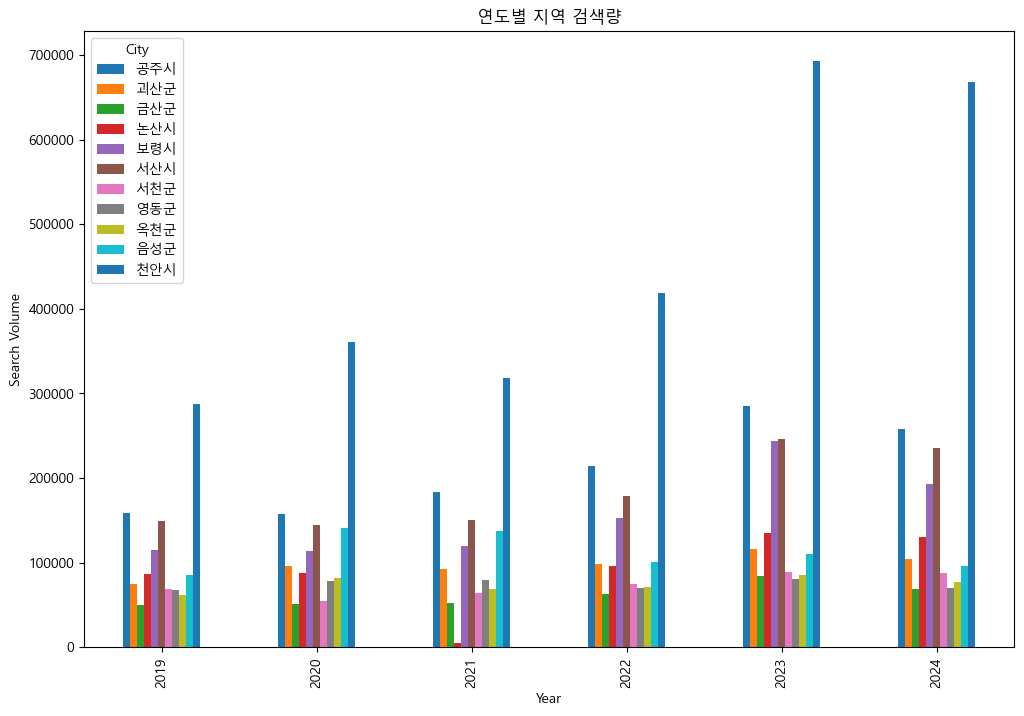

In [76]:
pivot_table = yearly_city_data.pivot(index='year', columns='City', values='Search_Volume')

pivot_table.plot(kind='bar', figsize=(12, 8), title='연도별 지역 검색량')
plt.xlabel('Year')
plt.ylabel('Search Volume')
plt.legend(title='City')
plt.show()

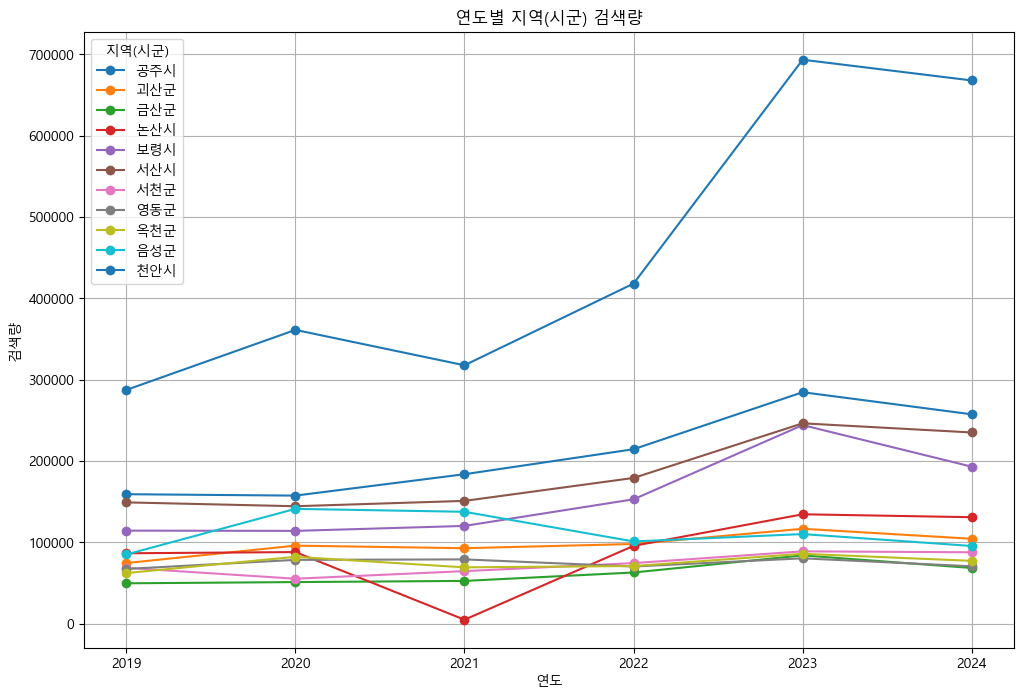

In [77]:
plt.figure(figsize=(12, 8))
for city in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[city], marker='o', label=city)

plt.title('연도별 지역(시군) 검색량')
plt.xlabel('연도')
plt.ylabel('검색량')
plt.legend(title='지역(시군)', loc='upper left')
plt.grid(True)
plt.show()


In [78]:
# 특정 지역 필터링
selected_city = '공주시'
city_data = df[df['City'] == selected_city]

print(f"{selected_city} 데이터:")
print(city_data.head())


공주시 데이터:
   year  month Province City Location  Search_Volume Year_Month City_Location
0  2024      1     충청남도  공주시      NaN          20466    2024-01           공주시
1  2024      2     충청남도  공주시      NaN          21763    2024-02           공주시
2  2024      3     충청남도  공주시      NaN          23553    2024-03           공주시
3  2024      4     충청남도  공주시      NaN          26274    2024-04           공주시
4  2024      5     충청남도  공주시      NaN          29286    2024-05           공주시


In [79]:
# 연도와 월 결합하여 새로운 컬럼 생성
df['Year_Month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

In [58]:
# 특정 지역 필터링
selected_city = '공주시'
city_data = df[df['City'] == selected_city]

print(f"{selected_city} 데이터 (기간별):")
print(city_data[['Year_Month', 'Search_Volume']].head())

공주시 데이터 (기간별):
  Year_Month  Search_Volume
0    2024-01          20466
1    2024-02          21763
2    2024-03          23553
3    2024-04          26274
4    2024-05          29286


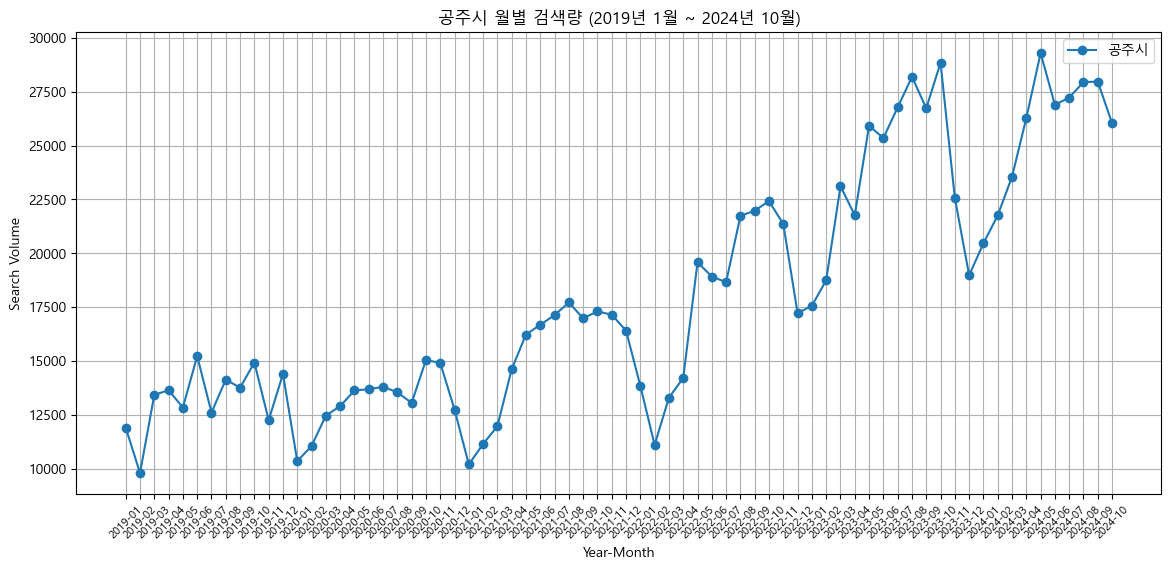

In [80]:
# 데이터 정렬
city_data = city_data.sort_values(by='Year_Month')

# 시각화
plt.figure(figsize=(14, 6))
plt.plot(city_data['Year_Month'], city_data['Search_Volume'], marker='o', linestyle='-', label=selected_city)
plt.title(f'{selected_city} 월별 검색량 (2019년 1월 ~ 2024년 10월)')
plt.xlabel('Year-Month')
plt.ylabel('Search Volume')
plt.xticks(rotation=45, fontsize=8)
plt.grid(True)
plt.legend()
plt.show()


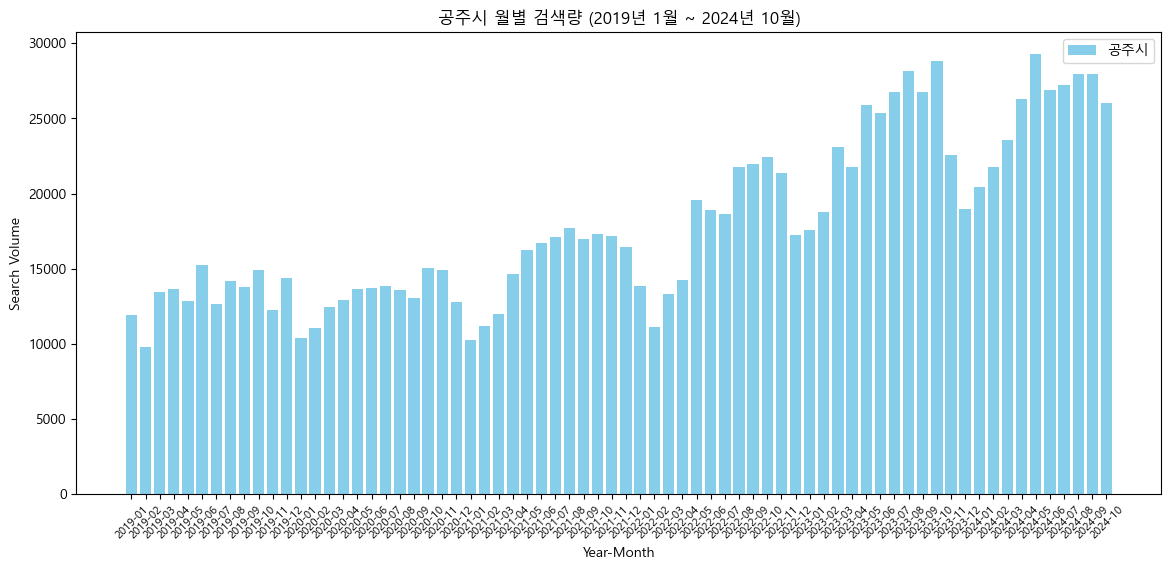

In [81]:
# 막대그래프
plt.figure(figsize=(14, 6))
plt.bar(city_data['Year_Month'], city_data['Search_Volume'], color='skyblue', label=selected_city)
plt.title(f'{selected_city} 월별 검색량 (2019년 1월 ~ 2024년 10월)')
plt.xlabel('Year-Month')
plt.ylabel('Search Volume')
plt.xticks(rotation=45, fontsize=8)
plt.legend()
plt.show()
